
# Saurabh Gupta

# Read and Load data

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import arange
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge


In [306]:
from google.colab import drive
drive.mount('/content/drive')

red_wine_file_path = '/content/drive/My Drive/ST590/HW07/winequality-red.csv'
white_wine_file_path = '/content/drive/My Drive/ST590/HW07/winequality-white.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [307]:
red_wine_df = pd.read_csv(red_wine_file_path, delimiter=';')
white_wine_df = pd.read_csv(white_wine_file_path, delimiter=';')

In [308]:
# Add a new column 'wine_type' to identify red or white wine
red_wine_df['wine_type'] = 'red'
white_wine_df['wine_type'] = 'white'

In [309]:
red_wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [310]:
white_wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


In [311]:
# Combine the datasets
red_white_wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)


In [312]:
print(red_wine_df.shape)
print(white_wine_df.shape)
print(red_white_wine_df.shape)

(1599, 13)
(4898, 13)
(6497, 13)


# Feature Selection

<ipython-input-313-0838885c5ab0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(red_white_wine_df.corr(), vmin=-1, vmax=1, annot=True)


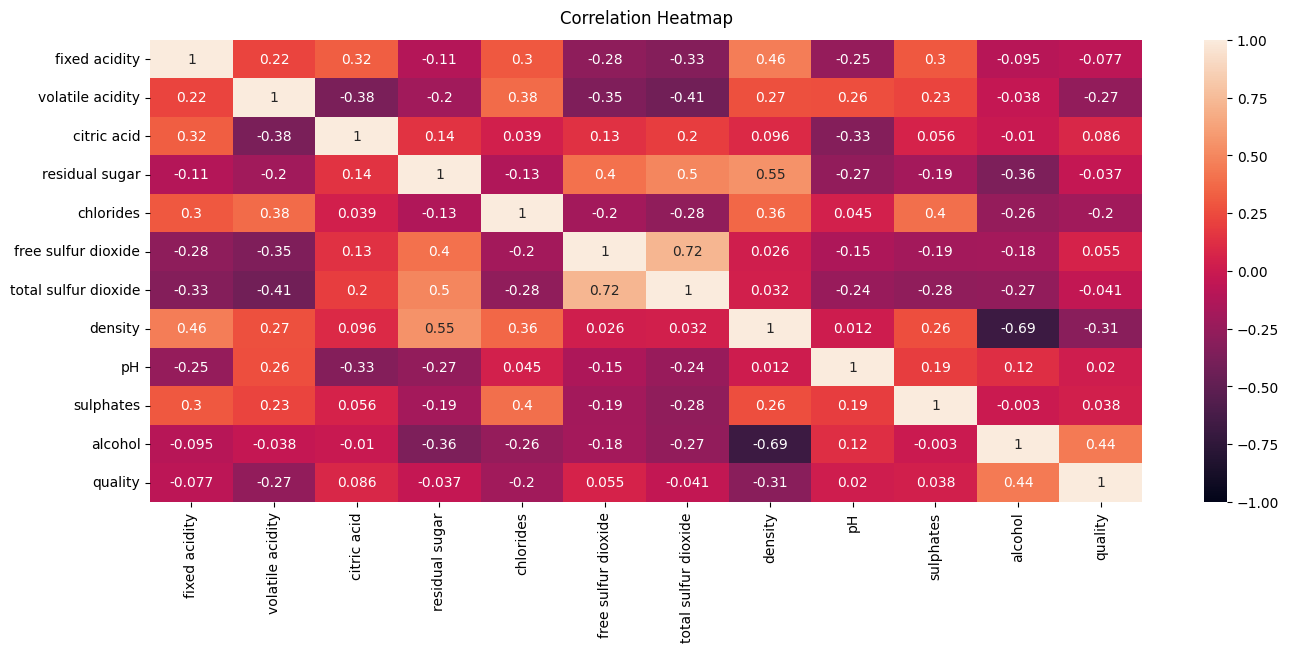

In [313]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(red_white_wine_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<ipython-input-314-ad424ec17641>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(red_white_wine_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


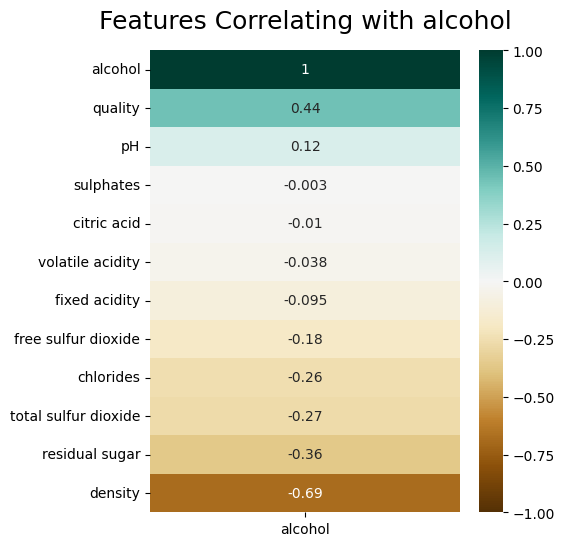

In [314]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(red_white_wine_df.corr()[['alcohol']].sort_values(by='alcohol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with alcohol', fontdict={'fontsize':18}, pad=16);

In [315]:
feature = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','quality']

X = red_white_wine_df[feature]
y = red_white_wine_df['alcohol']

In [316]:
linearreg = LinearRegression()
forwad = SequentialFeatureSelector(
linearreg,
n_features_to_select='auto',
direction='forward',
cv=5,
scoring="neg_mean_squared_error"
)
sf = forwad.fit(X,y)

ll = sf.get_feature_names_out
print(sf.feature_names_in_)
ls = sf.get_support(indices=True)
print("selected features -")
print(ls)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'quality']
selected features -
[ 0  6  7  8 10]


In [317]:
linearreg = LinearRegression()
forwad = SequentialFeatureSelector(
linearreg,
n_features_to_select='auto',
direction='backward',
cv=5,
scoring="neg_mean_squared_error"
)
sf = forwad.fit(X,y)

ll = sf.get_feature_names_out
print(sf.feature_names_in_)
ls = sf.get_support(indices=True)
print("selected features -")
print(ls)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'quality']
selected features -
[0 3 6 7 8 9]


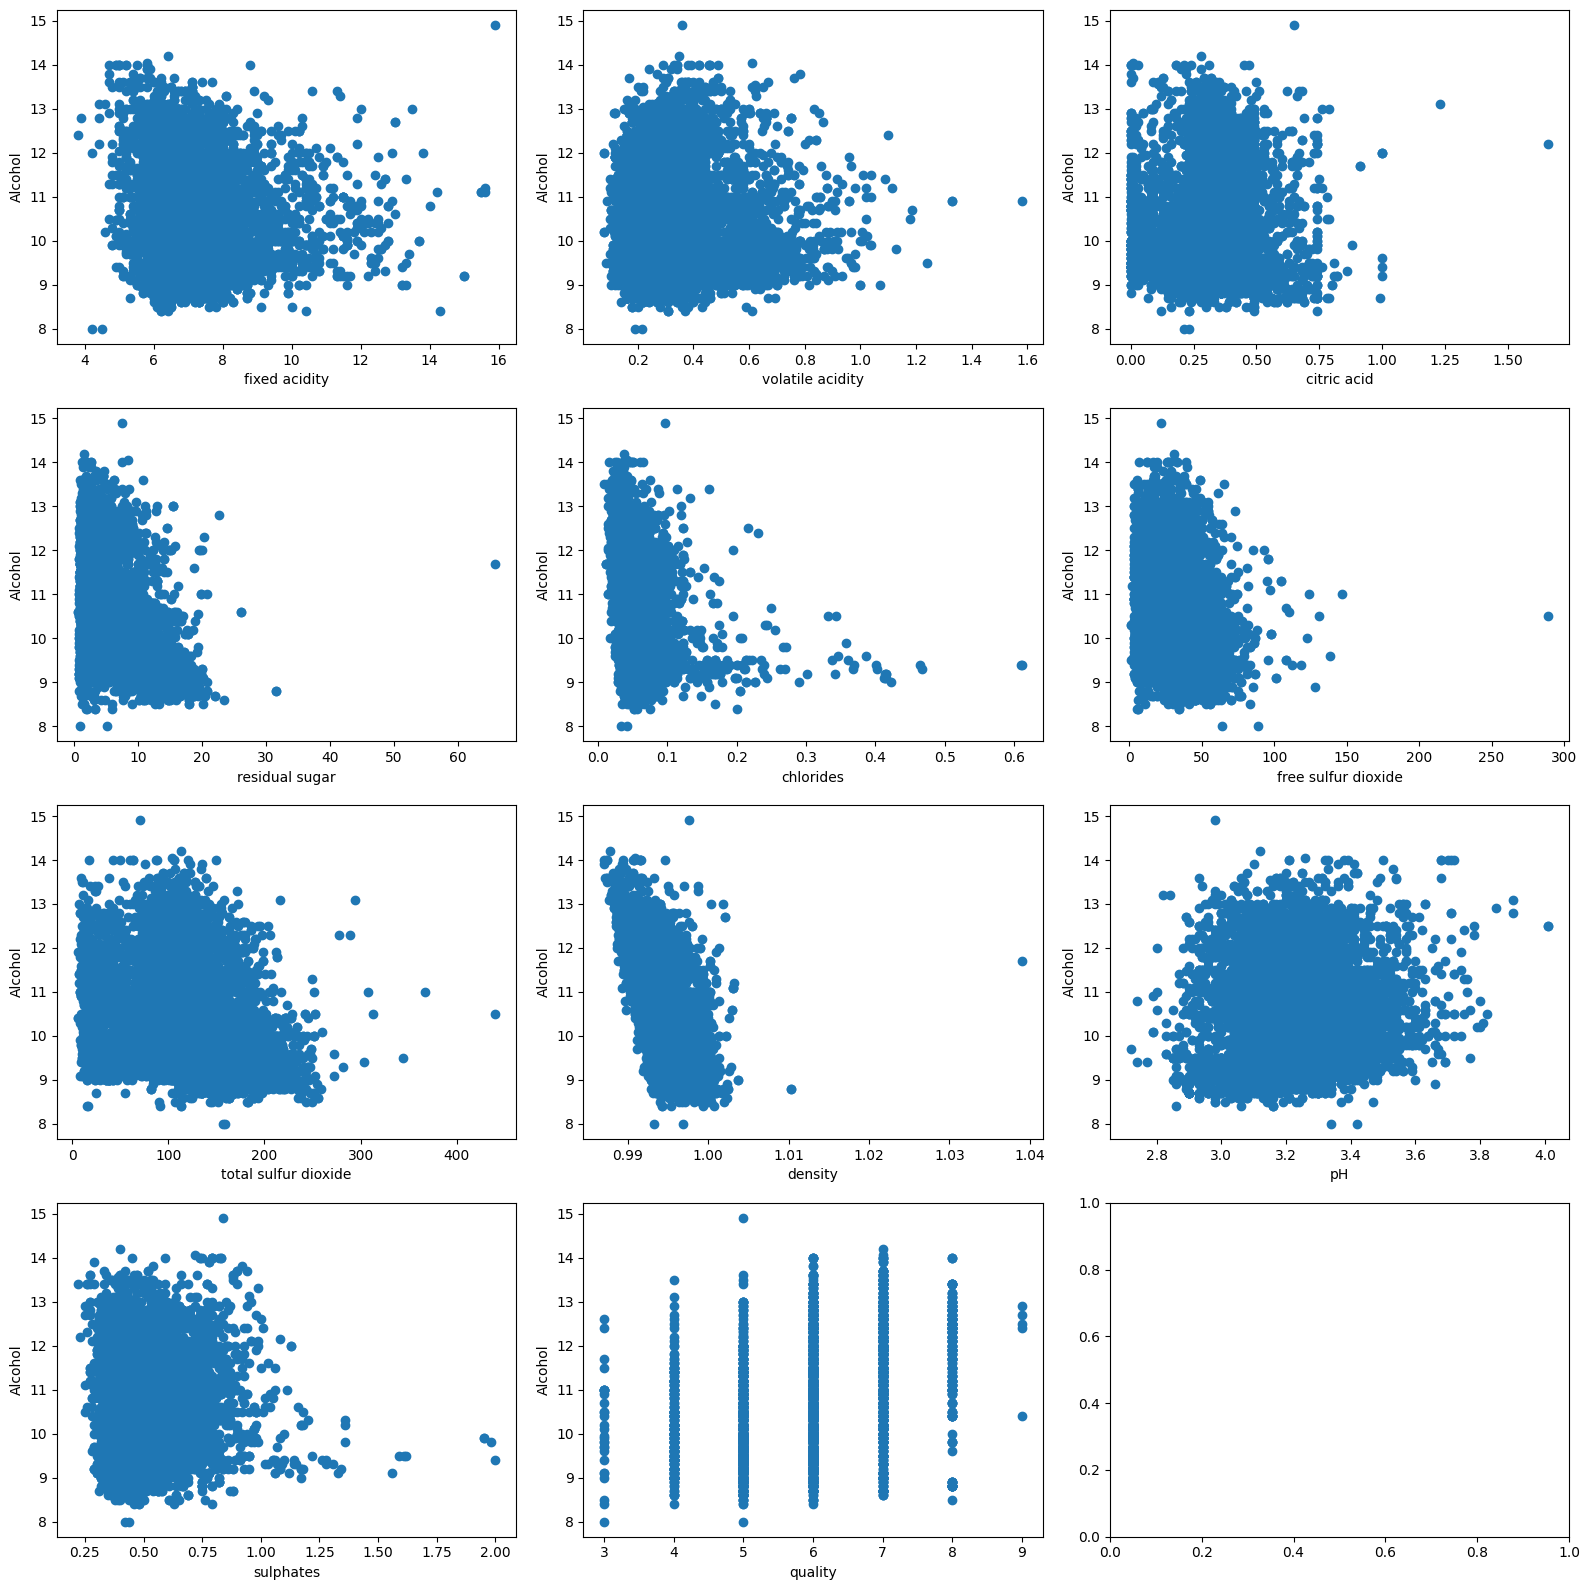

In [318]:
# Plot scatter plots for each feature against the target variable
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))

for i, feature in enumerate(feature):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(X[feature], y)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Alcohol')

plt.tight_layout()
plt.show()

# **Final Feature Selection**

Linear features - residual sugar, density, quality

Polynomial features - fixed acidity, pH

Interaction features - sulphates X citric acid

# 2. Training and Test Split
First, let's just read in all the functions we'll need from `sklearn`

In [319]:
feature = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','quality']

X = red_white_wine_df[feature]
y = red_white_wine_df['alcohol']

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)


# 3. Fit and Select Models on Training Data

First, we can standardize our variables. We'll save the values used for standardization so we can standardize the test set with those as well.

## Data modification


In [321]:
means = X_train.apply(np.mean, axis = 0)
means

fixed acidity             7.200144
volatile acidity          0.338846
citric acid               0.317502
residual sugar            5.386916
chlorides                 0.055622
free sulfur dioxide      30.594766
total sulfur dioxide    115.282471
density                   0.994627
pH                        3.219032
sulphates                 0.528921
quality                   5.832788
dtype: float64

In [322]:
stds = X_train.apply(np.std, axis = 0)
stds

fixed acidity            1.298403
volatile acidity         0.163129
citric acid              0.144032
residual sugar           4.720972
chlorides                0.033736
free sulfur dioxide     17.464969
total sulfur dioxide    56.044730
density                  0.003006
pH                       0.160861
sulphates                0.146411
quality                  0.878811
dtype: float64

In [323]:
# Stranderdized data
X_train = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
651,2.002348,3.317338,-0.468664,-0.611509,1.434021,0.252233,0.708676,2.120235,1.187159,0.963583,-0.947630
3622,-0.693270,-0.789845,-0.260376,-0.823330,-0.137008,0.882065,0.476718,-0.607959,0.068182,-0.743935,0.190270
3998,-0.847306,-1.096351,-0.538093,-0.844512,-0.285219,-0.778402,-0.683070,-0.478204,2.741294,0.280576,0.190270
2985,-1.232394,0.926590,-1.301815,-0.187867,-0.492713,-0.778402,0.012803,-1.306643,1.249325,2.534498,1.328171
5140,0.693048,-0.483339,-0.329806,-0.230231,-0.759492,0.710292,0.137703,-0.834200,-0.366976,-1.358641,0.190270
...,...,...,...,...,...,...,...,...,...,...,...
1144,0.076907,-0.115531,-0.607523,-0.653873,0.307623,0.252233,-0.807970,0.416777,1.311490,0.622079,-0.947630
48,-0.616253,0.374879,-0.607523,-0.802147,0.307623,-1.465492,-1.842858,0.390161,0.752002,0.212275,-0.947630
772,1.771295,1.417000,-0.329806,-0.653873,0.781896,-0.434857,0.512404,1.062228,0.316844,0.143974,-0.947630
5944,-0.077129,-0.851146,0.225628,-0.463234,-0.640923,-0.549372,-0.147783,-0.890760,-0.677803,0.075674,0.190270


# MLR Models

Below I'll consider some basic MLR models to compare. Even though we don't need to use CV on those to determine a tuning parameter, we can use CV on those to determine the best MLR model (using the training set alone). Similarly, we'll then find a 'best' LASSO model with tuning parameter selected by CV. Then we'll compare the two 'best' models on the test set to see the overall winner!

## MLR Model 1 - All linear features

In [324]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_mlr1 = cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    cv = cv,
    scoring = "neg_mean_squared_error")


## MLR Model 2 - 3 linear and 1 polynomial

In [325]:
mlr2_feature = ['residual sugar','density','quality','fixed acidity']
mlr2_df=red_white_wine_df[mlr2_feature]
poly = PolynomialFeatures(degree=2, include_bias=False)
#poly = PolynomialFeatures(interaction_only=True, include_bias = False)
poly_df = poly.fit_transform(red_white_wine_df[["fixed acidity"]])
#The plan was to concatenate the mlr2_subset_df and poly_df but cant do it as poly df is a numpy array and it require further column transformation
#I am going with easy way to Math power of function to create a polynomial term.

# Apply the function to the entire column using apply
mlr2_df['fixed acidity squared'] = red_white_wine_df['fixed acidity'].apply(lambda x: x ** 2)
mlr2_df.drop(columns=['fixed acidity'], inplace=True)
print(mlr2_df.head(3))

X = mlr2_df
y = red_white_wine_df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)


   residual sugar  density  quality  fixed acidity squared
0             1.9   0.9978        5                  54.76
1             2.6   0.9968        5                  60.84
2             2.3   0.9970        5                  60.84


<ipython-input-325-f665506ca16b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlr2_df['fixed acidity squared'] = red_white_wine_df['fixed acidity'].apply(lambda x: x ** 2)
<ipython-input-325-f665506ca16b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlr2_df.drop(columns=['fixed acidity'], inplace=True)


In [326]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_mlr2= cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    cv = cv,
    scoring = "neg_mean_squared_error")

## MLR Model 3 - 3 linear and 1 Interaction feature


In [327]:
mlr3_feature = ['residual sugar','density','quality']
mlr3_df=red_white_wine_df[mlr2_feature]
#poly = PolynomialFeatures(interaction_only=True, include_bias = False)
#design = poly.fit_transform(red_white_wine_df[["sulphates", "citric acid"]])
df1 = red_white_wine_df['sulphates']
df2 = red_white_wine_df['citric acid']
mlr3_df['interaction'] = df1 * df2

mlr3_df = mlr3_df[['residual sugar','density','quality','interaction']]
print(mlr3_df.head(3))

X = mlr3_df
y = red_white_wine_df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)


   residual sugar  density  quality  interaction
0             1.9   0.9978        5        0.000
1             2.6   0.9968        5        0.000
2             2.3   0.9970        5        0.026


<ipython-input-327-8ac2f53e6dd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlr3_df['interaction'] = df1 * df2


In [328]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_mlr3= cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    cv = cv,
    scoring = "neg_mean_squared_error")

## MLR Model 4 - 4 linear, 1 polynomial and 1 interaction feature

In [329]:
mlr4_feature = ['residual sugar','density','quality','pH','fixed acidity']
mlr4_df=red_white_wine_df[mlr4_feature]
mlr4_df['fixed acidity squared'] = red_white_wine_df['fixed acidity'].apply(lambda x: x ** 2)
mlr4_df.drop(columns=['fixed acidity'], inplace=True)
temp_df1 = red_white_wine_df['sulphates']
temp_df2 = red_white_wine_df['citric acid']
mlr4_df['interaction'] = temp_df1 * temp_df2
mlr4_df = mlr4_df[['residual sugar','density','quality','pH','fixed acidity squared','interaction']]
print(mlr4_df.head(3))

X = mlr4_df
y = red_white_wine_df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)

   residual sugar  density  quality    pH  fixed acidity squared  interaction
0             1.9   0.9978        5  3.51                  54.76        0.000
1             2.6   0.9968        5  3.20                  60.84        0.000
2             2.3   0.9970        5  3.26                  60.84        0.026


<ipython-input-329-a22d4a1c3e5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlr4_df['fixed acidity squared'] = red_white_wine_df['fixed acidity'].apply(lambda x: x ** 2)
<ipython-input-329-a22d4a1c3e5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlr4_df.drop(columns=['fixed acidity'], inplace=True)
<ipython-input-329-a22d4a1c3e5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [330]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_mlr4= cross_validate(
    LinearRegression(),
    X_train,
    y_train,
    cv = cv,
    scoring = "neg_mean_squared_error")

## Conculsion

In [331]:
print(np.sqrt(-sum(cv_mlr1['test_score'])),
      np.sqrt(-sum(cv_mlr2['test_score'])),
      np.sqrt(-sum(cv_mlr3['test_score'])),
      np.sqrt(-sum(cv_mlr4['test_score'])))

1.2173557566804616 1.6921714321460997 1.8082543158407085 1.4640701558548592


In [332]:

#Following code can be adjusted for X_train and y_train dataset of best MLR model
# here in this case the last one is picked which was MLR4
mlr_best = LinearRegression().fit(X_train, y_train)
print(mlr_best.intercept_)
print(np.array(list(zip(X_train.columns, mlr_best.coef_))))

10.513668783272443
[['residual sugar' '0.5879915208148755']
 ['density' '-1.4227475935483347']
 ['quality' '0.1503164019708045']
 ['pH' '0.48324364666679276']
 ['fixed acidity squared' '0.7175588818353228']
 ['interaction' '0.02852601099690511']]


# LASSO model

In [333]:
lasso_mod = LassoCV(cv=5, random_state=0) \
    .fit(X_train,
         y_train)

In [334]:
np.set_printoptions(suppress = True)
fit_info = np.array(list(zip(lasso_mod.alphas_, np.mean(lasso_mod.mse_path_, axis = 1))))
fit_info[fit_info[:,1].argsort()][0:10,].round(4)

array([[0.0008, 0.4272],
       [0.0009, 0.4272],
       [0.0009, 0.4272],
       [0.001 , 0.4272],
       [0.0011, 0.4272],
       [0.0012, 0.4272],
       [0.0012, 0.4272],
       [0.0013, 0.4272],
       [0.0014, 0.4272],
       [0.0015, 0.4272]])

In [335]:
print(lasso_mod.alpha_)
print(lasso_mod.intercept_)
print(np.array(list(zip(X_train.columns, lasso_mod.coef_))))

0.0008178766067084538
10.513668783272443
[['residual sugar' '0.5813497783654209']
 ['density' '-1.4153132259189116']
 ['quality' '0.15131620737664858']
 ['pH' '0.4790943673264099']
 ['fixed acidity squared' '0.7119848260372097']
 ['interaction' '0.027896259514193045']]


In [336]:
lasso_best = Lasso(lasso_mod.alpha_).fit(X_train,y_train)
lasso_best

Lasso(alpha=0.0008178766067084538)

In [337]:
lasso_pred = lasso_best.predict(X_test)
#could compare this to other 'best' models
np.sqrt(mean_squared_error(y_test, lasso_pred))

45.99109697299513

# Ridge Regression - L2 regularization

In [338]:

#Fit the model
alpha = 1.0
ridgereg = Ridge(alpha=alpha)
ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)
y_pred

array([135.17396847,  58.55644226,  58.42527763, ...,  60.55636824,
        89.78675098,  55.71852974])

In [339]:
ridge_mod = RidgeCV(cv=5) \
    .fit(X_train,
         y_train)

In [340]:


ridge_best = Ridge(ridge_mod.alpha_).fit(X_train,y_train)
ridge_best

Ridge(alpha=10.0)

In [341]:
ridge_pred = ridge_best.predict(X_test)
#could compare this to other 'best' models
np.sqrt(mean_squared_error(y_test, ridge_pred))

45.569835311637625

## 4. Compare on the Test Set

We need to standardize the test set using our training values. Then we can find the test set predictions and RMSE!

We'll see how to have python do this for us later. For now, let's do it manually!

In [342]:
#quick function to standardize based off of a supplied mean and std
def my_std_fun(x, means, stds):
    return(x-means)/stds
#loop through the columns and use the function on each
for x in X_test.columns:
    X_test[x] = my_std_fun(X_test[x], means[x], stds[x])
X_test.head()

,residual sugar,density,quality,pH,fixed acidity squared,interaction
564,-0.230231,2.486213,0.19027,0.503340,5.277282,1.615586
2550,0.913601,0.623055,0.19027,-0.864299,0.193413,-0.021656
1312,-0.738601,0.230462,-0.94763,0.752002,0.478593,-0.688935
3736,0.362867,0.656326,-0.94763,1.000663,-0.077141,-0.253582
5942,-0.823330,-0.761004,0.19027,0.938498,-0.908914,-0.233927


In [343]:
mlr_best = LinearRegression().fit(X_train, y_train)
mlr_pred = mlr_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)
ridge_pred = ridge_best.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, mlr_pred)), np.sqrt(mean_squared_error(y_test, lasso_pred)))
print(np.sqrt(mean_squared_error(y_test, mlr_pred)), np.sqrt(mean_squared_error(y_test, ridge_pred)))

0.6354691730390265 0.6355380759681016
0.6354691730390265 0.6356549361780521


In [344]:
means = X_train.apply(np.mean, axis = 0)
stds = X_train.apply(np.std, axis = 0)
X_train = X_train.apply(lambda x: (x-np.mean(x))/np.std(x), axis = 0)
X_train.head()

,residual sugar,density,quality,pH,fixed acidity squared,interaction
651,-0.611509,2.120235,-0.947630,1.187159,1.942878,-0.012811
3622,-0.823330,-0.607959,0.190270,0.068182,-0.632418,-0.503197
3998,-0.844512,-0.478204,0.190270,2.741294,-0.745759,-0.314512
2985,-0.187867,-1.306643,1.328171,1.249325,-1.013114,-0.509094
5140,-0.230231,-0.834200,0.190270,-0.366976,0.552172,-0.783278


# Elastic Net

In [345]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5,
                    random_state=0,
                    l1_ratio = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.98, 0.99, 1],
                    n_alphas = 50)
regr.fit(X_train, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.98, 0.99, 1],
             n_alphas=50, random_state=0)

In [346]:
print(regr.alpha_)
print(regr.l1_ratio_)

0.0010905021422779383
0.75


In [347]:
from sklearn.linear_model import ElasticNet
en_best = ElasticNet(alpha = regr.alpha_, l1_ratio = regr.l1_ratio_)
en_best.fit(X_train, y_train)

ElasticNet(alpha=0.0010905021422779383, l1_ratio=0.75)

In [348]:
print(np.array(list(zip(X_train.columns, en.coef_))))

[['residual sugar' '0.5793833268879969']
 ['density' '-1.4129016999218003']
 ['quality' '0.15185045988532464']
 ['pH' '0.4779901138267475']
 ['fixed acidity squared' '0.7102286312560774']
 ['interaction' '0.027954675235682718']]


In [349]:
lasso_pred = lasso_best.predict(X_test)
en_pred = en_best.predict(X_test)
print([np.sqrt(mean_squared_error(y_test, lasso_pred)),
       np.sqrt(mean_squared_error(y_test, en_pred))])

[0.6355380759681016, 0.635565154339796]


# Model Comparision

• Using your four selected models, compare their performance on the test set.

* Do so using RMSE as your model metric
* Do so using MAE as your model metric

In [350]:
lasso_pred = lasso_best.predict(X_test)
lasso_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasso_mae = mean_absolute_error(y_test, y_pred)

print("LASSO Model - RMSE:", lasso_rmse)
print("LASSO Model - MAE:", lasso_mae)

# Evaluate Ridge Regression model
ridge_pred = ridge_best.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, y_pred)

print("Ridge Regression Model - RMSE:", ridge_rmse)
print("Ridge Regression Model - MAE:", ridge_mae)

# Evaluate Elastic Net model
en_pred = en_best.predict(X_test)
en_rmse = mean_squared_error(y_test, y_pred, squared=False)
en_mae = mean_absolute_error(y_test, y_pred)

print("Elastic Net Regression Model - RMSE:", en_rmse)
print("Elastic Net Regression Model - MAE:", en_mae)


LASSO Model - RMSE: 46.274557111943125
LASSO Model - MAE: 43.551166363191484
Ridge Regression Model - RMSE: 46.274557111943125
Ridge Regression Model - MAE: 43.551166363191484
Elastic Net Regression Model - RMSE: 46.274557111943125
Elastic Net Regression Model - MAE: 43.551166363191484


# Classification Task



* Repeat the training and testing done previously but use logistic regression models.
* Use log-loss or negative log-loss as your metric for choosing models during the training process
* During the testing portion, compare your models on both log-loss and accuracy

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegressionCV

# Combine the datasets
red_white_wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)
# Convert wine types to categorical values
red_white_wine_df['wine_type'] = red_white_wine_df['wine_type'].map({'red': 0, 'white': 1})

# Split the data into features (X) and target variable (y)
X = red_white_wine_df.drop(columns=['wine_type'])
y = red_white_wine_df['wine_type']




In [352]:
red_white_wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0


In [353]:
# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)


In [354]:
neg_log_reg_cv = LogisticRegressionCV(cv = 5,
                               solver = "newton-cg",
                               penalty = "l2",
                               Cs = 250,
                               scoring = "neg_log_loss",
                               random_state = 10)
neg_log_reg_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=250, cv=5, random_state=10, scoring='neg_log_loss',
                     solver='newton-cg')

In [355]:
y_pred = neg_log_reg_cv.predict(X_test)
y_pred_proba = neg_log_reg_cv.predict_proba(X_test)

In [356]:
log_reg_best_cv = LogisticRegression(solver = "newton-cg",
                             penalty = "l2",
                             C = neg_log_reg_cv.C_[0],
                             random_state = 5)
log_reg_best_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10000.0, random_state=5, solver='newton-cg')

In [357]:
log_reg_full = LogisticRegression(solver = "newton-cg", penalty = "none", random_state = 0)
log_reg_full.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0, solver='newton-cg')

In [358]:
for i in range(log_reg_full.coef_.shape[1]):
  print(X_train.columns[i], log_reg_full.coef_[:,i], log_reg_best_cv.coef_[:,i])

fixed acidity [-0.29532944] [-0.87568901]
volatile acidity [-7.6452878] [-9.05989256]
citric acid [1.9085087] [1.52360669]
residual sugar [0.67354254] [0.39003958]
chlorides [-25.02188059] [-28.75036144]
free sulfur dioxide [-0.04726414] [-0.04338966]
total sulfur dioxide [0.04995019] [0.05333669]
density [-1074.84181733] [-518.39661927]
pH [-1.74133498] [-5.17853196]
sulphates [-4.64596068] [-6.29176657]
alcohol [-0.91680718] [-0.29573885]
quality [-0.25972898] [-0.17110864]


In [359]:
cv_proba_preds = log_reg_best_cv.predict_proba(X_test)
full_proba_preds = log_reg_full.predict_proba(X_test)

log_loss_cv = log_loss(y_test, cv_proba_preds)

log_loss_full = log_loss(y_test, full_proba_preds)

log_loss_range = log_loss(y_test, np.array([[0,1] for _ in range(len(y_test.values))]))

cv_preds = log_reg_best_cv.predict(X_test)
full_preds = log_reg_full.predict(X_test)

accuracy_score_cv = accuracy_score(y_test, cv_preds)
accuracy_score_full = accuracy_score(y_test, full_preds)
accuracy_score_range = accuracy_score(y_test, np.array([1 for _ in range(len(y_test.values))]))

print(f"Log Loss cv: {log_loss_cv}")
print(f"Log Loss full: {log_loss_full}")
print(f"Log Loss range: {log_loss_full}")
print(f"Accuracy cv: {accuracy_score_cv}")
print(f"Accuracy full: {accuracy_score_full}")
print(f"Accuracy range: {accuracy_score_full}")


Log Loss cv: 0.022637470877599836
Log Loss full: 0.019446703764510267
Log Loss range: 0.019446703764510267
Accuracy cv: 0.9953846153846154
Accuracy full: 0.9946153846153846
Accuracy range: 0.9946153846153846


* Log Loss: This metric measures the performance of a classification model by quantifying the accuracy of the probability estimates. A lower log-loss value indicates better performance.
* Accuracy: This metric measures the proportion of correctly classified samples out of the total number of samples. A higher accuracy value indicates better performance.



It seems that the model performs slightly worse in terms of log-loss when evaluated with cross-validation compared to the full dataset. However, the difference is minimal. On the other hand, both accuracy values are very high, indicating excellent performance of the logistic regression model on this dataset.



Overall, the model demonstrates high accuracy and low log-loss.